<a href="https://colab.research.google.com/github/Pallav-Lama/Basic-MachineLearningProjects/blob/main/Transfer_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

5-flower-types-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/5-flower-types-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/flower_images',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256),
    subset="training",
    seed=123,
    validation_split = 0.2
)



Found 4999 files belonging to 5 classes.
Using 4000 files for training.


In [ ]:
valid_ds = keras.utils.image_dataset_from_directory(
        directory = '/content/flower_images',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256),
    subset="validation",
    seed=123,
    validation_split = 0.2
)

Found 4999 files belonging to 5 classes.
Using 999 files for validation.


In [ ]:
class_labels = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256, 256, 3)
)

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(5, activation ='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 18,909,765
Trainable params: 4,195,077
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data=valid_ds)

Epoch 1/10
125/125 [==============================] - 28s 209ms/step - loss: 3.5097 - accuracy: 0.6090 - val_loss: 0.8365 - val_accuracy: 0.7207
Epoch 2/10
125/125 [==============================] - 27s 214ms/step - loss: 0.4907 - accuracy: 0.8345 - val_loss: 0.5922 - val_accuracy: 0.8488
Epoch 3/10
125/125 [==============================] - 27s 208ms/step - loss: 0.2377 - accuracy: 0.9260 - val_loss: 0.6052 - val_accuracy: 0.8739
Epoch 4/10
125/125 [==============================] - 28s 217ms/step - loss: 0.1528 - accuracy: 0.9557 - val_loss: 0.5485 - val_accuracy: 0.8799
Epoch 5/10
125/125 [==============================] - 26s 207ms/step - loss: 0.1077 - accuracy: 0.9655 - val_loss: 0.6121 - val_accuracy: 0.8779
Epoch 6/10
125/125 [==============================] - 27s 208ms/step - loss: 0.0752 - accuracy: 0.9760 - val_loss: 0.6448 - val_accuracy: 0.8849
Epoch 7/10
125/125 [==============================] - 27s 210ms/step - loss: 0.0706 - accuracy: 0.9783 - val_loss: 0.7742 - val_ac

In [ ]:
train_acc = history.history['accuracy']
epochs = history.epoch
val_acc = history.history['val_accuracy']

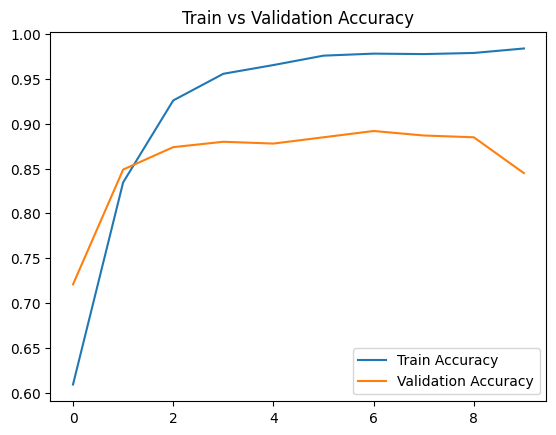

In [ ]:
plt.plot(epochs, train_acc, label = "Train Accuracy")
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

In [ ]:
train_loss = history.history['loss']
epochs = history.epoch
val_loss = history.history['val_loss']

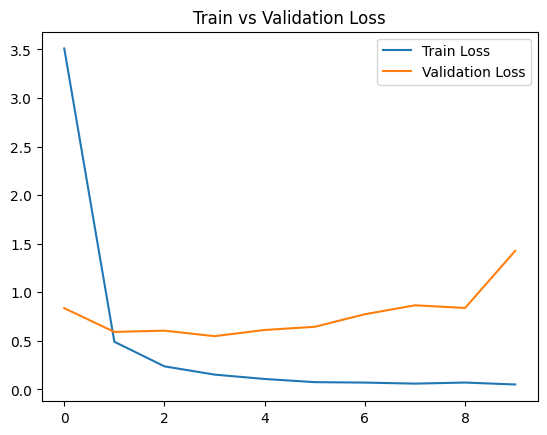

In [ ]:
plt.plot(epochs, train_loss, label = "Train Loss")
plt.plot(epochs, val_loss, label = "Validation Loss")
plt.title("Train vs Validation Loss")
plt.legend()

# Inference
* It is overfitted, To prevent overfitting we can use different methods:
1. Dropout
2. Batch Normalization
3. Data Augmentation


In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (256, 256, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),

])


In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation ='softmax'))
conv_base.trainable = False
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs = 10, validation_data=valid_ds)

Epoch 1/10
125/125 [==============================] - 31s 216ms/step - loss: 0.8209 - accuracy: 0.7070 - val_loss: 0.6361 - val_accuracy: 0.7948
Epoch 2/10
125/125 [==============================] - 28s 222ms/step - loss: 0.4267 - accuracy: 0.8535 - val_loss: 0.4031 - val_accuracy: 0.8669
Epoch 3/10
125/125 [==============================] - 27s 212ms/step - loss: 0.3073 - accuracy: 0.9010 - val_loss: 0.3365 - val_accuracy: 0.8869
Epoch 4/10
125/125 [==============================] - 27s 214ms/step - loss: 0.2676 - accuracy: 0.9090 - val_loss: 0.3163 - val_accuracy: 0.8959
Epoch 5/10
125/125 [==============================] - 32s 252ms/step - loss: 0.2108 - accuracy: 0.9340 - val_loss: 0.2711 - val_accuracy: 0.9099
Epoch 6/10
125/125 [==============================] - 28s 216ms/step - loss: 0.1938 - accuracy: 0.9383 - val_loss: 0.3051 - val_accuracy: 0.8979
Epoch 7/10
125/125 [==============================] - 28s 216ms/step - loss: 0.1728 - accuracy: 0.9467 - val_loss: 0.2993 - val_ac

In [ ]:
train_acc = history.history['accuracy']
epochs = history.epoch
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
epochs = history.epoch
val_loss = history.history['val_loss']

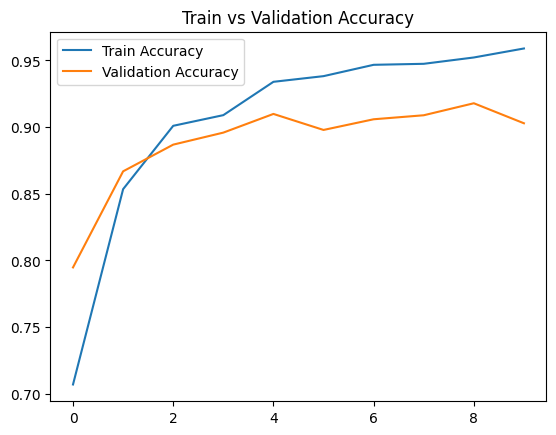

In [ ]:
plt.plot(epochs, train_acc, label = "Train Accuracy")
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

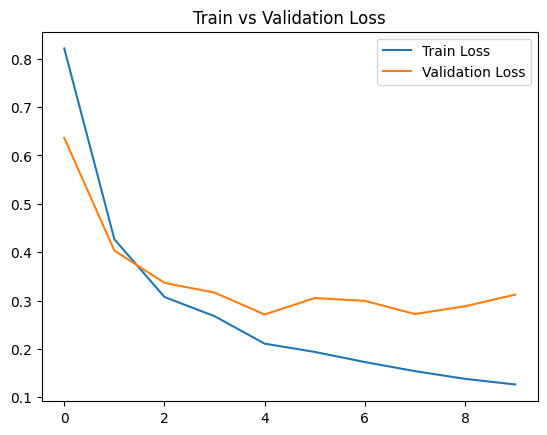

In [ ]:
plt.plot(epochs, train_loss, label = "Train Loss")
plt.plot(epochs, val_loss, label = "Validation Loss")
plt.title("Train vs Validation Loss")
plt.legend()

In [ ]:
# Testing with real world data
!wget https://hips.hearstapps.com/hmg-prod/images/how-to-grow-sunflowers-1611933753.jpg

--2023-05-31 16:58:38--  https://hips.hearstapps.com/hmg-prod/images/how-to-grow-sunflowers-1611933753.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297974 (291K) [image/jpeg]
Saving to: ‘how-to-grow-sunflowers-1611933753.jpg’

how-to-grow-sunflow 100%[===================>] 290.99K  --.-KB/s    in 0.002s  

2023-05-31 16:58:38 (116 MB/s) - ‘how-to-grow-sunflowers-1611933753.jpg’ saved [297974/297974]



In [ ]:
import cv2
in_im = cv2.imread("/content/how-to-grow-sunflowers-1611933753.jpg")


1/1 [==============================] - 1s 737ms/step


array([[1.0855085e-02, 5.9828009e-02, 3.4287357e-05, 9.2806327e-01,
        1.2192590e-03]], dtype=float32)

In [ ]:
def flower_classification(image):
  image = cv2.resize(image, (256, 256), interpolation = cv2.INTER_AREA)
  processed_image = np.expand_dims(image, 0)
  prediction = (np.argmax(model.predict(processed_image)))
  plt.title(class_labels[prediction])
  plt.axis('off')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)

1/1 [==============================] - 0s 20ms/step


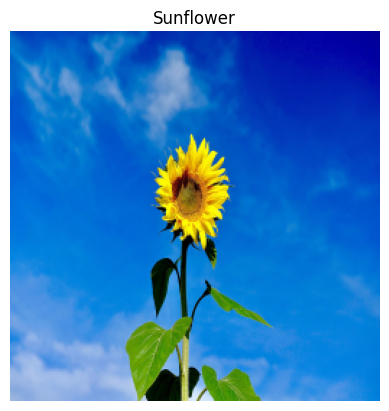

In [ ]:
flower_classification(in_im)

In [ ]:
!wget https://thumbs.dreamstime.com/b/easter-lily-8087007.jpg

--2023-05-31 17:18:56--  https://thumbs.dreamstime.com/b/easter-lily-8087007.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81178 (79K) [image/jpeg]
Saving to: ‘easter-lily-8087007.jpg’

easter-lily-8087007 100%[===================>]  79.28K  --.-KB/s    in 0.001s  

2023-05-31 17:18:57 (81.6 MB/s) - ‘easter-lily-8087007.jpg’ saved [81178/81178]



In [ ]:
img = cv2.imread("/content/easter-lily-8087007.jpg")

1/1 [==============================] - 0s 21ms/step


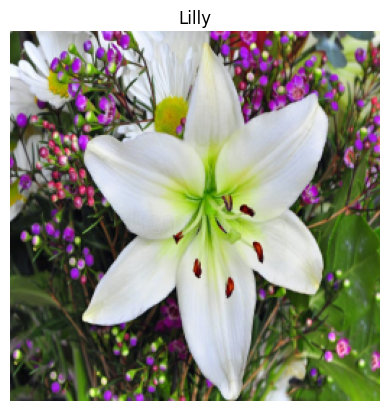

In [ ]:
flower_classification(img)

In [ ]:
!wget https://img.theculturetrip.com/wp-content/uploads/2017/05/field-of-flowers-2269528_1920.jpg

--2023-05-31 17:24:17--  https://img.theculturetrip.com/wp-content/uploads/2017/05/field-of-flowers-2269528_1920.jpg
Resolving img.theculturetrip.com (img.theculturetrip.com)... 54.192.150.50, 54.192.150.101, 54.192.150.23, ...
Connecting to img.theculturetrip.com (img.theculturetrip.com)|54.192.150.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1327341 (1.3M) [image/jpeg]
Saving to: ‘field-of-flowers-2269528_1920.jpg’

field-of-flowers-22 100%[===================>]   1.27M  6.00MB/s    in 0.2s    

2023-05-31 17:24:18 (6.00 MB/s) - ‘field-of-flowers-2269528_1920.jpg’ saved [1327341/1327341]



In [ ]:
tulips = cv2.imread('/content/field-of-flowers-2269528_1920.jpg')

1/1 [==============================] - 0s 21ms/step


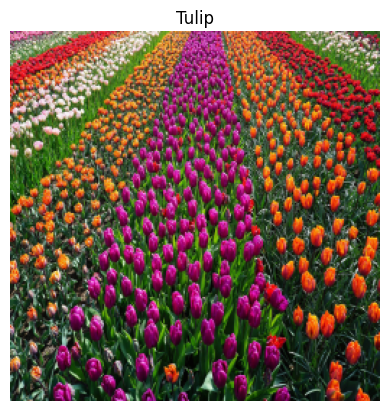

In [ ]:
flower_classification(tulips)

In [ ]:
!wget https://thumbs.dreamstime.com/b/blue-orchid-brunch-orchid-blue-flowers-violet-viens-86237526.jpg

--2023-05-31 17:25:50--  https://thumbs.dreamstime.com/b/blue-orchid-brunch-orchid-blue-flowers-violet-viens-86237526.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54730 (53K) [image/jpeg]
Saving to: ‘blue-orchid-brunch-orchid-blue-flowers-violet-viens-86237526.jpg’

blue-orchid-brunch- 100%[===================>]  53.45K  --.-KB/s    in 0.001s  

2023-05-31 17:25:50 (64.2 MB/s) - ‘blue-orchid-brunch-orchid-blue-flowers-violet-viens-86237526.jpg’ saved [54730/54730]



In [ ]:
orchid = cv2.imread('/content/blue-orchid-brunch-orchid-blue-flowers-violet-viens-86237526.jpg')

1/1 [==============================] - 0s 20ms/step


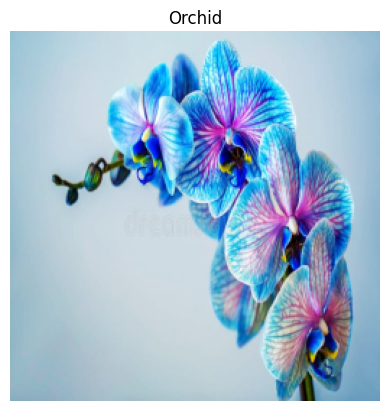

In [ ]:
flower_classification(orchid)

In [ ]:
!wget https://www.gardeningknowhow.com/wp-content/uploads/2017/02/lotus.jpg

--2023-05-31 17:29:07--  https://www.gardeningknowhow.com/wp-content/uploads/2017/02/lotus.jpg
Resolving www.gardeningknowhow.com (www.gardeningknowhow.com)... 23.185.0.3, 2620:12a:8001::3, 2620:12a:8000::3
Connecting to www.gardeningknowhow.com (www.gardeningknowhow.com)|23.185.0.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107352 (105K) [image/jpeg]
Saving to: ‘lotus.jpg’

lotus.jpg           100%[===================>] 104.84K  --.-KB/s    in 0.003s  

2023-05-31 17:29:07 (40.2 MB/s) - ‘lotus.jpg’ saved [107352/107352]



In [ ]:
lotus = cv2.imread('/content/lotus.jpg')

1/1 [==============================] - 0s 20ms/step


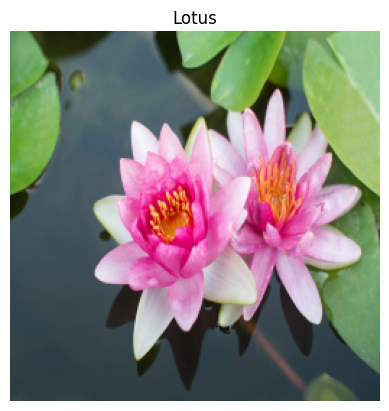

In [ ]:
flower_classification(lotus)